Total number of typhoon (Each Year)

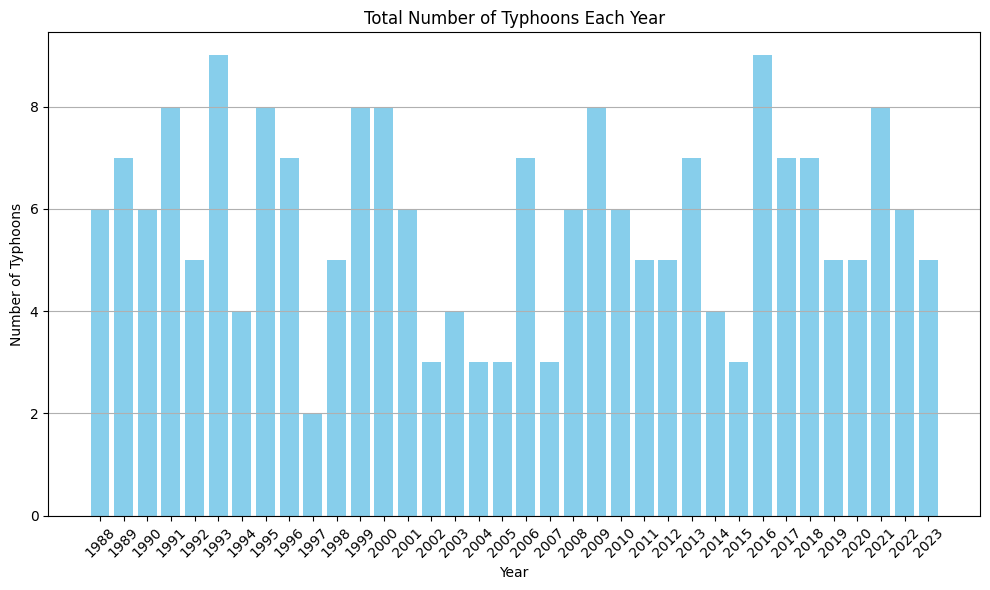

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#total number of typhoon (each year)
#Year,Name,Chinese Name,JMA ID,"Highest TC Warning Signal Issued During this Passage",Times of Passages,"Issuance Date of First TC Warning Signal During this Passage","Cancellation Date of all TC Warning Signal During this Passage","Duration of all Issued TC Warning Signals During this Passage (hh:mm)","Lifespan Max Intensity Classification","Estimated Min Central Pressure of the TC (hPa) when Closest to HK","Closest Distance to HK (km)","Closest Approach Bearing"
data = pd.read_csv('TC_Impact_Data_HKO.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Year'] = data['Year'].dt.year
typhoon_counts = data['Year'].value_counts().sort_index()
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(typhoon_counts.index, typhoon_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Typhoons')
plt.title('Total Number of Typhoons Each Year')
plt.xticks(typhoon_counts.index, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




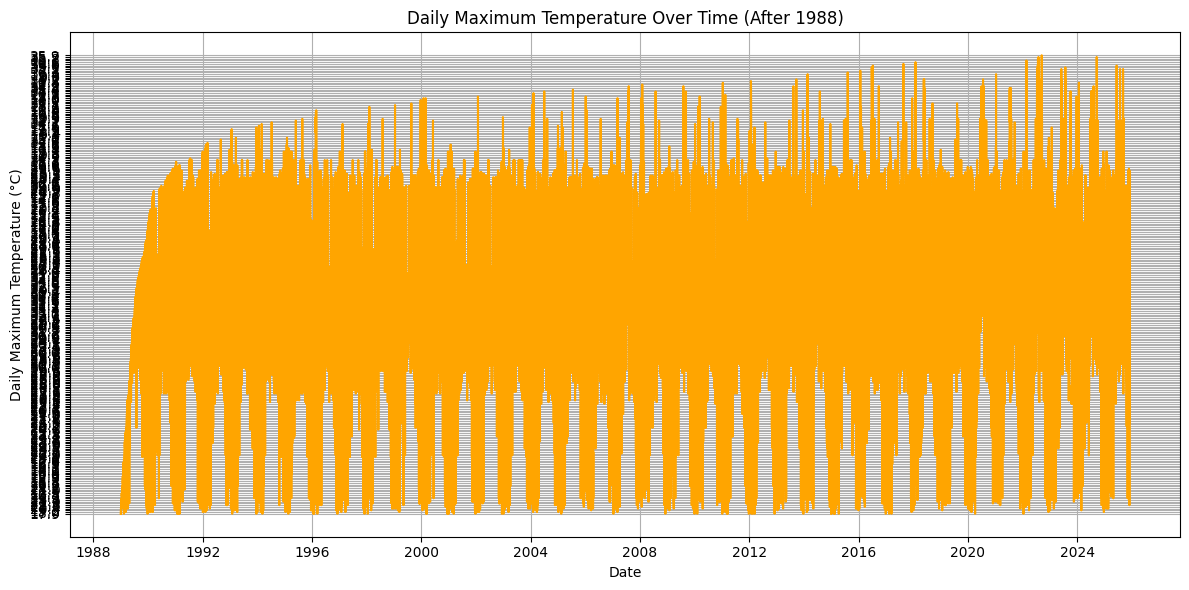

In [11]:
data = pd.read_csv('CLMMAXT_HKO_.csv')
#年/Year,月/Month,日/Day,數值/Value,"數據完整性/data Completeness"
#1884,1,1,15.3,C
#show the graph of daily maximum temperature in all data
data['Date'] = pd.to_datetime(dict(year=data['年/Year'], month=data['月/Month'], day=data['日/Day']), errors='coerce')
data = data.dropna(subset=['Date'])  # Remove rows with invalid dates
data = data[data['Date'].dt.year > 1988]  # Filter for years after 1988
data = data.sort_values('Date')
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['數值/Value'], color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Maximum Temperature (°C)')
plt.title('Daily Maximum Temperature Over Time (After 1988)')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\kinglingmk1\AppData\Local\Temp\ipykernel_7964\2906208750.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_typhoon['Issuance Date of First TC Warning Signal During this Passage'] = pd.to_datetime(data_typhoon['Issuance Date of First TC Warning Signal During this Passage'], errors='coerce')


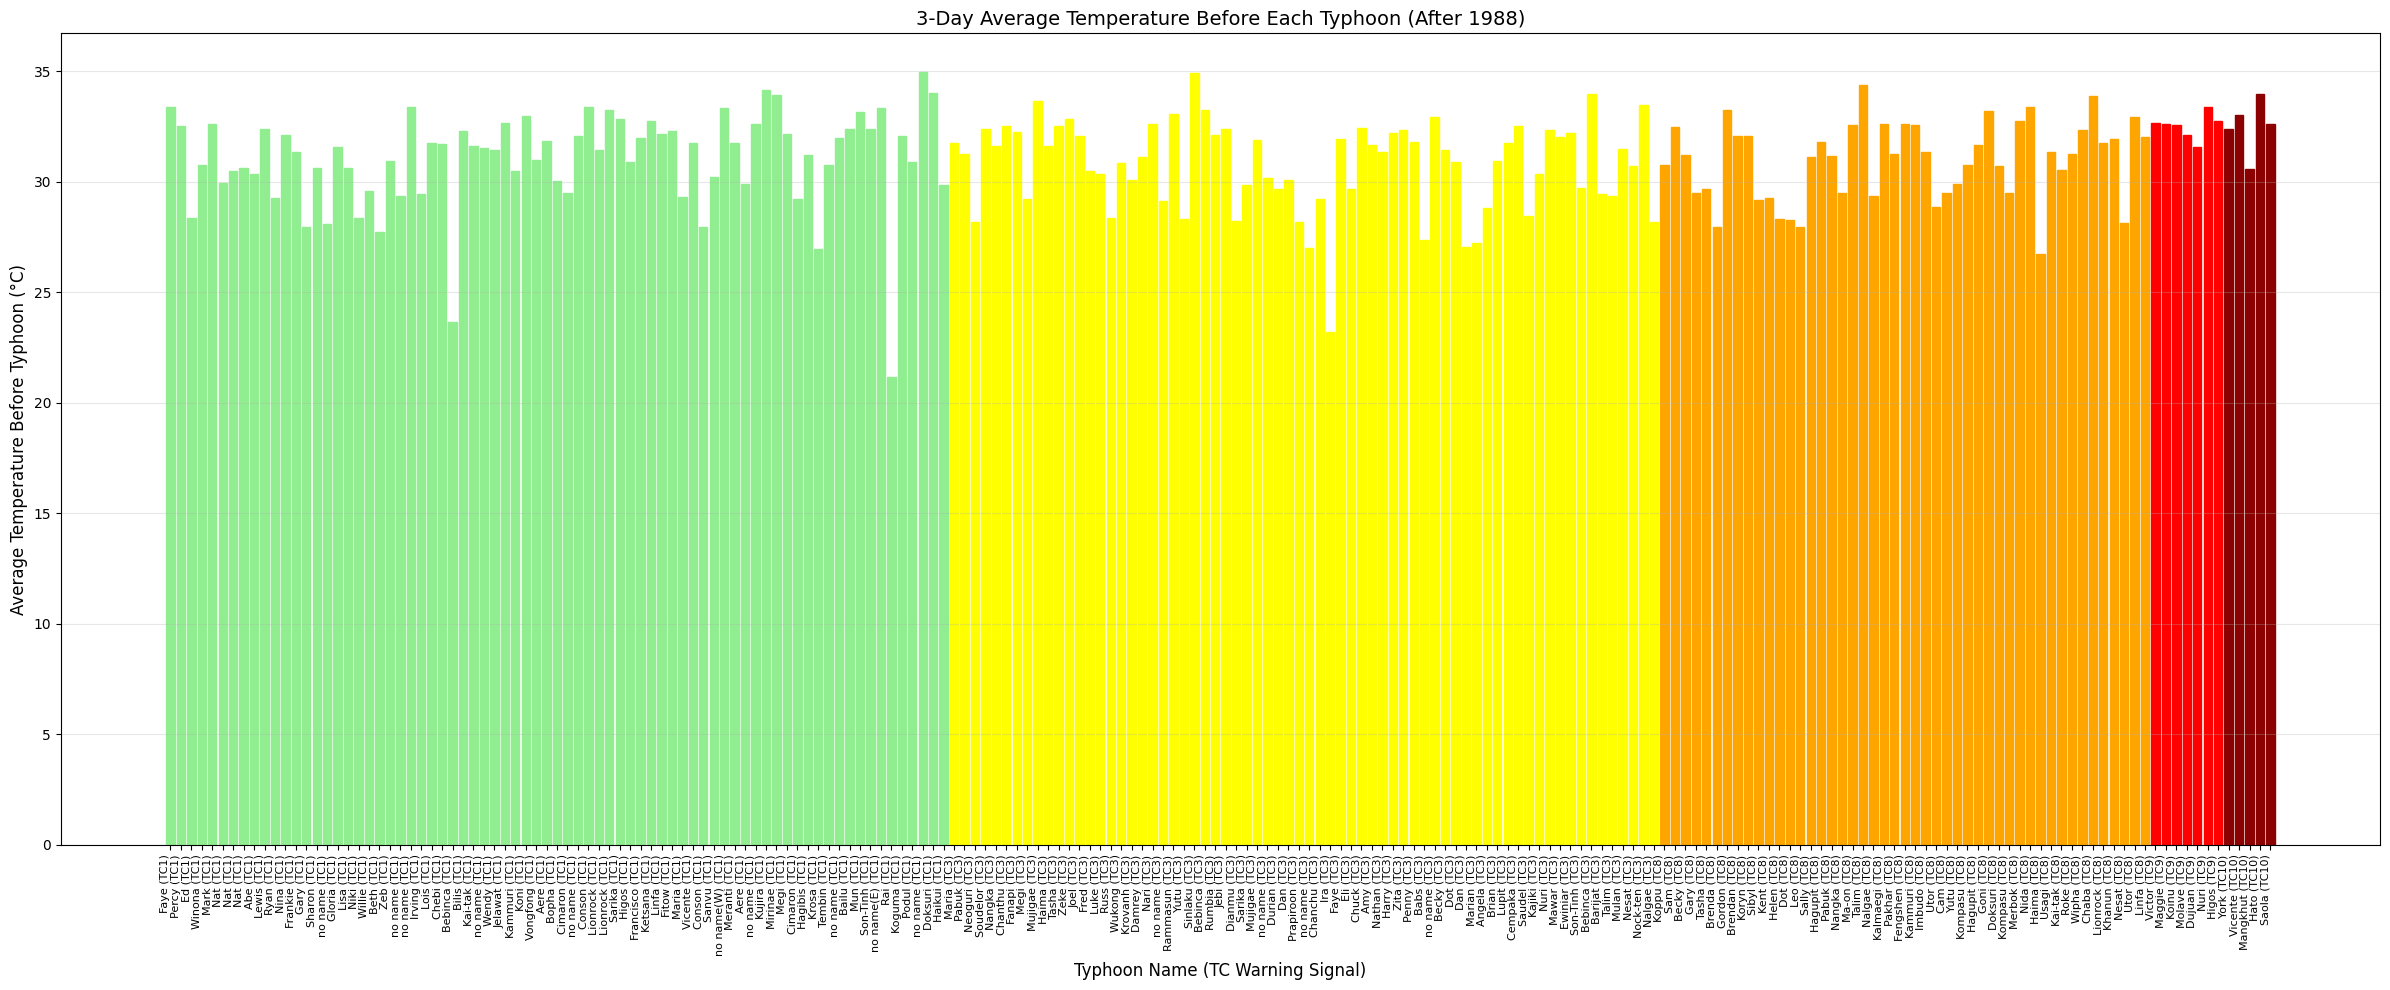

In [25]:
#show the typhoon before 3 days average tempeture in pandas row graph
data_typhoon = pd.read_csv('TC_Impact_Data_HKO.csv')
data_typhoon['Year'] = pd.to_datetime(data_typhoon['Year'], format='%Y')
data_typhoon['Year'] = data_typhoon['Year'].dt.year
data_typhoon = data_typhoon[data_typhoon['Year'] > 1988]
data_typhoon['Issuance Date of First TC Warning Signal During this Passage'] = pd.to_datetime(data_typhoon['Issuance Date of First TC Warning Signal During this Passage'], errors='coerce')
data_typhoon = data_typhoon.dropna(subset=['Issuance Date of First TC Warning Signal During this Passage'])
data_typhoon = data_typhoon.sort_values('Issuance Date of First TC Warning Signal During this Passage')
temp_data = pd.read_csv('CLMMAXT_HKO_.csv')
temp_data['Date'] = pd.to_datetime(dict(year=temp_data['年/Year'], month=temp_data['月/Month'], day=temp_data['日/Day']), errors='coerce')
temp_data = temp_data.dropna(subset=['Date'])  # Remove rows with invalid dates
temp_data['數值/Value'] = pd.to_numeric(temp_data['數值/Value'], errors='coerce')  # Convert to numeric, invalid values become NaN
temp_data = temp_data.set_index('Date')
avg_temps = []
for index, row in data_typhoon.iterrows():
    typhoon_date = row['Issuance Date of First TC Warning Signal During this Passage']
    start_date = typhoon_date - pd.Timedelta(days=3)
    end_date = typhoon_date - pd.Timedelta(days=1)
    temp_slice = temp_data.loc[start_date:end_date]
    avg_temp = temp_slice['數值/Value'].mean()
    avg_temps.append(avg_temp)
data_typhoon['Avg Temp Before Typhoon (3 days)'] = avg_temps

# Sort by TC warning signal
data_typhoon = data_typhoon.sort_values('Highest TC Warning Signal Issued During this Passage')

# Create labels combining typhoon name and TC warning signal
data_typhoon['Label'] = data_typhoon['Name'] + ' (TC' + data_typhoon['Highest TC Warning Signal Issued During this Passage'].astype(str) + ')'

# Plot
fig, ax = plt.subplots(figsize=(24, 10))
x_pos = np.arange(len(data_typhoon))
bars = ax.bar(x_pos, data_typhoon['Avg Temp Before Typhoon (3 days)'], color='steelblue')

# Color bars by TC warning level
colors = {1: 'lightgreen', 3: 'yellow', 8: 'orange', 9: 'red', 10: 'darkred'}
for i, (idx, row) in enumerate(data_typhoon.iterrows()):
    tc_level = row['Highest TC Warning Signal Issued During this Passage']
    if tc_level in colors:
        bars[i].set_color(colors[tc_level])

ax.set_xlabel('Typhoon Name (TC Warning Signal)', fontsize=12)
ax.set_ylabel('Average Temperature Before Typhoon (°C)', fontsize=12)
ax.set_title('3-Day Average Temperature Before Each Typhoon (After 1988)', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(data_typhoon['Label'], rotation=90, ha='right', fontsize=8)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
#show a like excel list that before a typhoon the average temperature in 3 days
#use typhoon name, before typhoon 3 days average temperature, typhoon, Highest TC Warning Signal Issued During this Passage
result_df = data_typhoon[['Name', 'Avg Temp Before Typhoon (3 days)', 'Highest TC Warning Signal Issued During this Passage']]
print(result_df.to_string(index=False))


      Name  Avg Temp Before Typhoon (3 days)  Highest TC Warning Signal Issued During this Passage
    Brenda                         27.966667                                                     8
       Dot                         30.900000                                                     3
      Faye                         33.400000                                                     1
    Gordon                         33.233333                                                     8
     Brian                         30.933333                                                     3
    Angela                         28.800000                                                     3
       Dan                         27.066667                                                     3
    Marian                         27.233333                                                     3
    Nathan                         31.366667                                                     3
     Percy

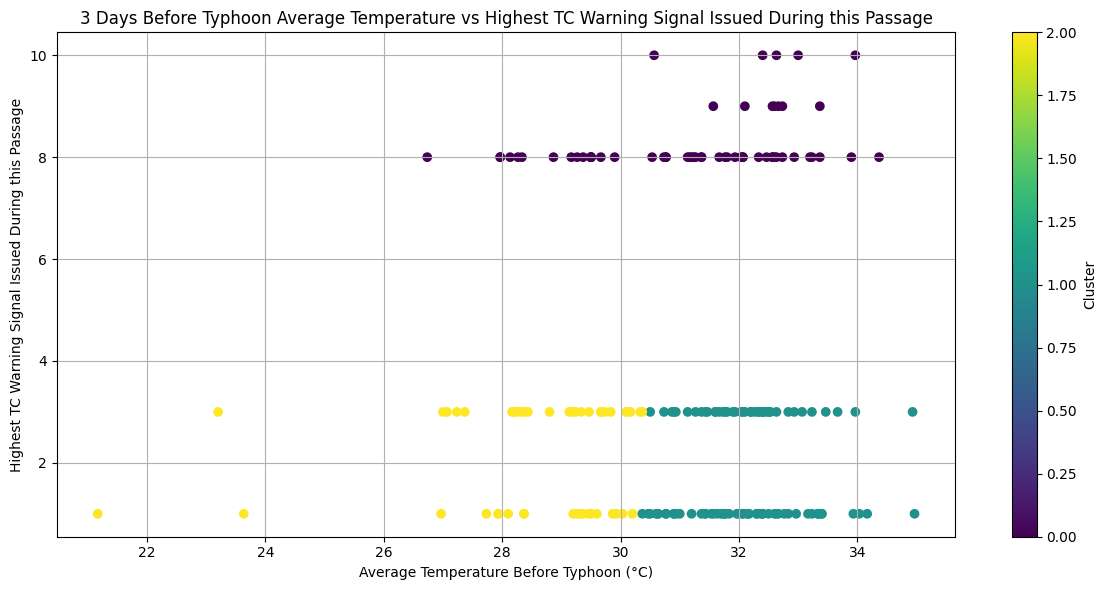

In [22]:
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 6))
months = data_typhoon['Issuance Date of First TC Warning Signal During this Passage'].dt.month
X = data_typhoon[['Avg Temp Before Typhoon (3 days)', 'Highest TC Warning Signal Issued During this Passage']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data_typhoon['Cluster'] = kmeans.labels_
scatter = plt.scatter(data_typhoon['Avg Temp Before Typhoon (3 days)'], data_typhoon['Highest TC Warning Signal Issued During this Passage'], c=data_typhoon['Cluster'], cmap='viridis')
plt.xlabel('Average Temperature Before Typhoon (°C)')
plt.ylabel('Highest TC Warning Signal Issued During this Passage')
plt.title('3 Days Before Typhoon Average Temperature vs Highest TC Warning Signal Issued During this Passage')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.tight_layout()
plt.show()
